In [1]:
###Importing Libraries###
import cv2 as cv
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from plots import *

270.642073281335 248.55623072737166
26782202885.68045 5838647.856883753 33334904875.368446
0.00010900238097123585 3.028927331354696
3.317785601799844
[[26.76357093 26.86308004 26.96258914 ... 29.54766927 29.64717838
  29.74668749]
 [59.97384436 59.97382236 59.97380035 ... 89.51100154 89.51097953
  89.51095752]]


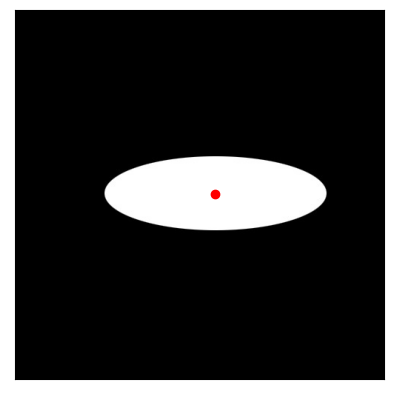

225.17432552623777 275.27631188852655
183096379.91402316 -323084730.40913093 602963303.3471683
-0.5276060503703065 2.0510621628347065
1.6741109300167891
[[122.71769106 123.08651171 123.45533237 ... 116.85559627 117.22441693
  117.59323759]
 [158.920218   159.05337286 159.18652771 ... 186.99065925 187.1238141
  187.25696896]]


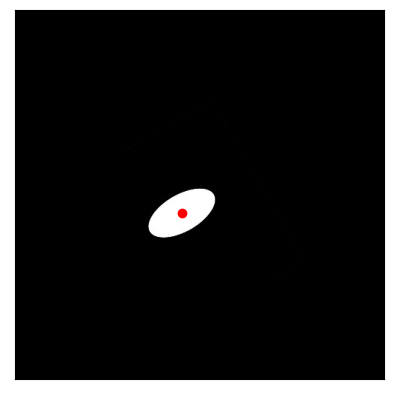

263.82462522045853 298.3863536155203
9108176265.555553 5294819172.374337 17583874252.74474
0.263287699569422 1.9973458568988063
3.8073212341501366
[[31.66148842 30.64584529 30.78622906 ... 23.52083537 22.50519224
  22.64557601]
 [49.64640859 50.13087438 50.09791763 ... 84.03368703 84.51815282
  84.48519607]]


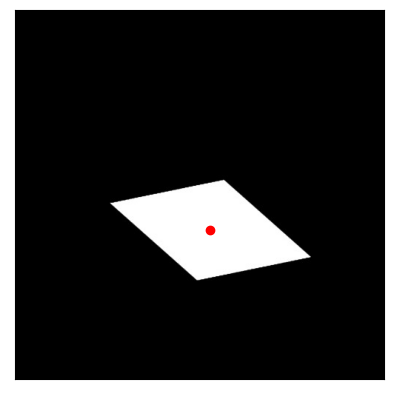

In [2]:


###Importing Picture###
for i in range(1,4):
    src = cv.imread('../images/affine_transformation/image_'+str(i)+'_13.jpg')
    #src = cv.imread('./image_2_13.jpg')
    #src = cv.imread('./image_3_13.jpg')

    ###calculating the Center###
    length = src.shape[1]
    width = src.shape[0]

    x_shape, y_shape = [], []
    xc, yc = 0, 0
    brightness = 0

    for i in range(length):
        for j in range(width):
            if np.any(src[i][j] == 255):
                xc += j * src[i][j][0]
                yc += i * src[i][j][0]
                brightness += src[i][j][0]

    for i in range(length):
        for j in range(width):
            if np.any(src[i][j] == 255):
                x_shape.append(j)
                y_shape.append(i)
    shape = np.array([x_shape, y_shape])
    xc = xc / brightness
    yc = yc / brightness
    print(xc, yc)
    #Plot the center
    plot_result(src, "original")
    draw_center_point(xc, yc)

    ###Calculating B, C and D###
    B, C, D = 0, 0, 0

    for i in range(length):
        for j in range(width):
            if np.any(src[i][j] == 255):
                B += src[i][j][0] * ((j - xc)**2 - (i - yc)**2)
                C += src[i][j][0] * 2 * (j - xc) * (i - yc)
                D += src[i][j][0] * ((j - xc)**2 + (i - yc)**2)
    print(B, C, D)

    ###Calculating theta and mu###
    n=0
    theta = .5 * np.arctan2(C, B) + np.pi * n
    mu = np.sqrt((D + np.sqrt(C**2 + B**2)) / (D - np.sqrt(C**2 + B**2)))
    #mu = -mu
    print(theta, mu)

    ###Calculating x_plus and y_plus using the matricial product###
    R_plus_om = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    R_minus_om = np.array([[np.cos(-theta), -np.sin(-theta)], [np.sin(-theta), np.cos(-theta)]])
    S = np.array([[1/mu, 0], [0, 1]])
    center_plus = R_plus_om @ S @ R_minus_om @ shape


    ###Putting the values into an array###
    '''
    We create an empty array of the size of our original pictures.
    We put the values at 255 in our array at the calculated x_plus and y_plus .
    '''
    big_circle = np.zeros((length, width))
    for i in range(len(x_shape)):
        absc = int(center_plus[0][i])
        orde = int(center_plus[1][i])
        big_circle[absc][orde] = 255

    #Ploting and saving the created picture
    #cv.imshow("Picture",big_circle)
    cv.imwrite("../results/affine_transformation/big_circle_"+str(i)+".jpg",big_circle)

    ###Calculating M###
    K=10
    summ1=0
    summ2=0
    for i in range (0,length):
        for j in range (0,width):
            xpls=(1/mu)*((j-xc)*mt.cos(-theta)-(i-yc)*mt.sin(-theta))*mt.cos(theta)-((j-xc)*mt.sin(-theta)+(i-yc)*mt.cos(-theta))*mt.sin(theta)
            ypls=(1/mu)*((j-xc)*mt.cos(-theta)-(i-yc)*mt.sin(-theta))*mt.sin(theta)+((j-xc)*mt.sin(-theta)+(i-yc)*mt.cos(-theta))*mt.cos(theta)
            summ1+=src[i][j][0]*mt.sqrt((xpls*xpls)+(ypls*ypls))
            summ2+=src[i][j][0]

    M=summ1/(K*summ2)
    print(M)

    ###Calculating x_tilde and y_tilde###
    M_mat = np.array([[1/M, 0], [0, 1/M]])
    center_tilde = M_mat @ center_plus
    print(center_tilde)

    ###Putting the values into an array###
    '''
    We create an empty array of the size of our original pictures.
    We put the values at 255 in our array at the calculated x_tilde and y_tilde .
    '''
    final = np.zeros((length, width))
    for i in range(len(center_tilde[0])):
        absc = int(center_tilde[0][i])
        orde = int(center_tilde[1][i])
        final[absc][orde] = 255
    #Ploting and saving the created picture    
    #cv.imshow("Final",final)
    cv.imwrite("../results/affine_transformation/final_"+str(i)+".jpg",final)
    plt.show()
